In [3]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np

In [4]:
all_detections = pd.read_csv('csvs/detected_imgs_txts/combined.txt', header=None, names=['filename'])
all_detections[['pi', 'datetime']] = all_detections['filename'].str.extract(r'(\d+)_(\d{8}_\d{6})')
all_detections['datetime'] = pd.to_datetime(all_detections['datetime'], format='%Y%m%d_%H%M%S')

all_detections = all_detections.drop(columns=('filename'))
all_detections

,pi,datetime
0,10,2024-07-22 08:22:04
1,10,2024-07-22 09:52:23
2,10,2024-07-22 13:26:24
3,10,2024-07-22 14:13:31
4,10,2024-07-22 14:56:19
...,...,...
22026,1,2024-07-14 09:33:49
22027,1,2024-07-14 10:57:14
22028,1,2024-07-14 13:18:16
22029,1,2024-07-14 14:30:52


In [5]:
id_data = pd.read_csv('csvs/bee_cam_detections.csv', header=None, dtype=str, names=['pi','day_month', 'time_start', 'time_end', 'genus'])
id_data['genus'] = id_data['genus'].fillna('bombus')
id_data['genus'] = id_data['genus'].replace('AM', 'apis')
id_data

,pi,day_month,time_start,time_end,genus
0,1,0721,090946,091153,bombus
1,1,0725,112233,NaN,bombus
2,2,0724,113721,NaN,bombus
3,2,0726,105637,105719,bombus
4,4,0721,113322,NaN,apis
...,...,...,...,...,...
77,9,0723,101638,102504,bombus
78,1,0726,135444,NaN,bombus
79,1,0905,073955,074000,bombus
80,5,0720,081904,081918,bombus


In [6]:
def expand_rows(row):
    if pd.notna(row['time_end']):
        start = datetime.strptime(f"{row['day_month']} {row['time_start']}", "%m%d %H%M%S")
        end = datetime.strptime(f"{row['day_month']} {row['time_end']}", "%m%d %H%M%S")
        
        seconds = [start + timedelta(seconds=x) for x in range(int((end - start).total_seconds() + 1))]
        
        return pd.DataFrame({
            'pi': row['pi'],
            'day_month': row['day_month'],
            'time': [s.strftime('%H%M%S') for s in seconds],
            'genus': row['genus']
        })
    else:
        return pd.DataFrame({
            'pi': [row['pi']],
            'day_month': [row['day_month']],
            'time': [row['time_start']],
            'genus': [row['genus']]
        })


In [7]:
expanded_rows = [expand_rows(row) for index, row in id_data.iterrows()]

expanded_df = pd.concat(expanded_rows, ignore_index=True)
expanded_df['datetime'] = pd.to_datetime(expanded_df['day_month'] + expanded_df['time'], format='%m%d%H%M%S').apply(lambda x: x.replace(year=2024))
df_sorted = expanded_df.sort_values(by='datetime')

df_sorted = df_sorted.reset_index(drop=True)

In [8]:
# df_sorted.to_csv('ffilled_detections.csv', index=False)
df_sorted = pd.read_csv('csvs/ffilled_detections.csv')

In [9]:
treatment_times = pd.read_csv('csvs/treatment_times.csv')
treatment_times

,pi,datetime,date,color
0,1,2024-07-11 05:02:04,2024-07-11,cnt
1,1,2024-07-11 05:02:06,2024-07-11,cnt
2,1,2024-07-11 05:02:08,2024-07-11,cnt
3,1,2024-07-11 05:02:11,2024-07-11,cnt
4,1,2024-07-11 05:02:13,2024-07-11,cnt
...,...,...,...,...
18163358,10,2024-09-08 11:27:30,2024-09-08,blv
18163359,10,2024-09-08 11:27:31,2024-09-08,blv
18163360,10,2024-09-08 11:27:32,2024-09-08,blv
18163361,10,2024-09-08 11:27:33,2024-09-08,blv


In [10]:
df_sorted['pi'] = df_sorted['pi'].astype(int)


In [11]:
df_sorted

,pi,day_month,time,genus,datetime
0,6,713,85740,?,2024-07-13 08:57:40
1,6,713,85741,?,2024-07-13 08:57:41
2,6,713,85742,?,2024-07-13 08:57:42
3,6,713,85743,?,2024-07-13 08:57:43
4,6,713,85744,?,2024-07-13 08:57:44
...,...,...,...,...,...
5777,1,905,73957,bombus,2024-09-05 07:39:57
5778,1,905,73958,bombus,2024-09-05 07:39:58
5779,1,905,73959,bombus,2024-09-05 07:39:59
5780,1,905,74000,bombus,2024-09-05 07:40:00


In [12]:
treatment_times['datetime'] = pd.to_datetime(treatment_times['datetime'], format='%Y-%m-%d %H:%M:%S')
df_sorted['datetime'] = pd.to_datetime(df_sorted['datetime'], format='%Y-%m-%d %H:%M:%S')

In [13]:
merged_df = pd.merge(df_sorted, treatment_times[['pi', 'datetime', 'color']], on=['pi', 'datetime'], how='left')
merged_df = merged_df.dropna()

In [14]:
all_detections['pi'] = all_detections['pi'].astype(int)
merged_all = pd.merge(all_detections, treatment_times[['pi', 'datetime', 'color']], on=['pi', 'datetime'], how='left')


In [15]:
merged_all

,pi,datetime,color
0,10,2024-07-22 08:22:04,blv
1,10,2024-07-22 09:52:23,blv
2,10,2024-07-22 13:26:24,blv
3,10,2024-07-22 14:13:31,blv
4,10,2024-07-22 14:56:19,blv
...,...,...,...
22041,1,2024-07-14 09:33:49,cnt
22042,1,2024-07-14 10:57:14,cnt
22043,1,2024-07-14 13:18:16,cnt
22044,1,2024-07-14 14:30:52,cnt


In [16]:
bombus_df = merged_df[merged_df['genus'] == 'bombus'].drop(columns=['day_month', 'time', 'genus']).reset_index(drop=True)
apis_df = merged_df[merged_df['genus'] == 'apis'].drop(columns=['day_month', 'time', 'genus']).reset_index(drop=True)

In [17]:
bombus_df

,pi,datetime,color
0,9,2024-07-13 09:24:11,grn
1,9,2024-07-13 09:39:15,grn
2,1,2024-07-14 09:28:52,cnt
3,8,2024-07-14 09:43:43,blu
4,10,2024-07-15 09:15:47,blv
...,...,...,...
5146,1,2024-09-05 07:39:56,blv
5147,1,2024-09-05 07:39:57,blv
5148,1,2024-09-05 07:39:58,blv
5149,1,2024-09-05 07:39:59,blv


In [18]:
apis_df['datetime'].dt.date.value_counts()

datetime
2024-07-24    141
2024-08-09      6
2024-07-22      3
2024-08-13      3
2024-07-19      1
2024-07-21      1
2024-07-31      1
2024-08-07      1
2024-08-08      1
2024-08-15      1
2024-08-20      1
2024-08-25      1
2024-09-07      1
Name: count, dtype: int64

In [19]:
def filter_rows(group):
    time_diffs = group['datetime'].diff().dt.total_seconds().fillna(999)
    return group.loc[time_diffs >= 10]

In [20]:
bombus_visits = bombus_df.groupby('pi').apply(filter_rows).reset_index(drop=True)
bombus_visits['color'].value_counts()

color
blv    17
blu    12
cnt     8
grn     7
yel     7
Name: count, dtype: int64

In [21]:
apis_visits = apis_df.groupby('pi').apply(filter_rows).reset_index(drop=True)
apis_visits[apis_visits['datetime'].dt.date == pd.Timestamp('2024-08-09').date()]

,pi,datetime,color
0,1,2024-08-09 13:28:35,blv
3,4,2024-08-09 18:35:41,yel
7,5,2024-08-09 10:08:40,blu
8,5,2024-08-09 13:28:47,blu
9,5,2024-08-09 14:24:30,blu
16,7,2024-08-09 14:00:35,cnt


In [22]:
bombus_df['color'].value_counts()

color
grn    3278
blv    1640
yel     168
cnt      46
blu      19
Name: count, dtype: int64

In [23]:
bombus_df['hour'] = bombus_df['datetime'].dt.hour
bombus_df['date_hour'] = bombus_df['datetime'].dt.date
bombus_visits['hour'] = bombus_visits['datetime'].dt.hour
bombus_visits['date_hour'] = bombus_visits['datetime'].dt.date

bombus_hour_counts = bombus_visits.groupby(['color', 'hour']).size().unstack(fill_value=0)
bombus_hour_counts = bombus_hour_counts.stack().reset_index()
bombus_hour_counts.columns = ['color', 'hour', 'count']
bombus_pivot = bombus_hour_counts.pivot(index='hour', columns='color', values='count').fillna(0)

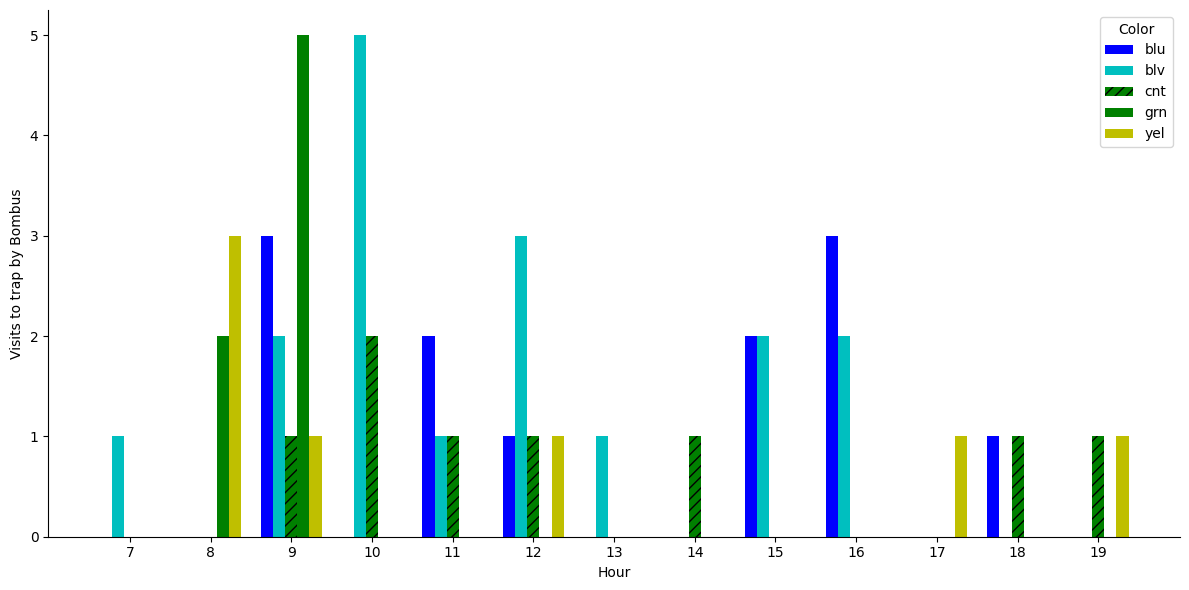

In [60]:
color_hatch_map = {
    'blu': ('b', ''),
    'blv': ('c', ''),
    'cnt': ('g', '///'),
    'grn': ('g', ''),
    'yel': ('y', '')
}

fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.15
index_array = np.arange(len(bombus_pivot.index))
colors = bombus_pivot.columns
max_value = bombus_pivot.values.max()


# Plot each color as a separate group of bars for each hour
for i, color in enumerate(colors):
    plot_color, hatch_pattern = color_hatch_map.get(color, ('grey', ''))
    ax.bar(index_array + i * bar_width, bombus_pivot[color], width=bar_width, label=color, color=plot_color, hatch=hatch_pattern)

# Formatting
ax.set_xticks(index_array + bar_width * (len(colors) - 1) / 2)
ax.set_xticklabels(bombus_pivot.index, rotation=0)
ax.set_xlabel('Hour')
ax.set_ylabel('Visits to trap by Bombus')
ax.legend(title='Color')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
# # ax.set_yscale('log')

# ax.annotate(f'{int(max_value)}', xy=(0, max_value), xytext=(-40, 1),
#             textcoords='offset points', ha='right', va='center', fontsize=10, color='k')

plt.tight_layout()
plt.savefig('figs/tot_by_hour_bombusvisits.png', format='png', dpi=300)


In [25]:
bombus_date_hour = bombus_visits.groupby(['color', 'date_hour']).size().unstack(level=0, fill_value=0)
colors = bombus_date_hour.columns
width = 0.3
time_offsets = pd.to_timedelta(np.arange(len(bombus_date_hour.columns)) * width, unit='h')

color_hatch_map = {
    'blu': ('b', ''),
    'blv': ('c', ''),
    'cnt': ('g', '///'),
    'grn': ('g', ''),
    'yel': ('y', '')
}


- **EVAP** - Evaporation of water from evaporation pan  
- **SX35** - Maximum soil temperature with bare ground cover at 100 cm depth  
- **SX33** - Maximum soil temperature with bare ground cover at 20 cm depth  
- **SX32** - Maximum soil temperature with bare ground cover at 10 cm depth  
- **SX31** - Maximum soil temperature with bare ground cover at 5 cm depth  
- **SNOW** - Snowfall  
- **PRCP** - Precipitation  
- **TOBS** - Temperature at the time of observation  
- **SNWD** - Snow depth  
- **SX36** - Maximum soil temperature with bare ground cover at 150 cm depth  
- **TMAX** - Maximum temperature  
- **TMIN** - Minimum temperature  
- **SN32** - Minimum soil temperature with bare ground cover at 10 cm depth  
- **SN33** - Minimum soil temperature with bare ground cover at 20 cm depth  
- **WDMV** - Total wind movement  
- **SN31** - Minimum soil temperature with bare ground cover at 5 cm depth  


In [26]:
weather = pd.read_csv('csvs/hyslop_weather.csv')
weather = weather.loc[:, ~weather.columns.str.endswith('_ATTRIBUTES')]
weather = weather[['DATE', 'PRCP', 'TMAX', 'TMIN', 'WDMV']]

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 4))

weather['DATE'] = pd.to_datetime(weather['DATE'])
bombus_date_hour.index = pd.to_datetime(bombus_date_hour.index)
merged_weather = weather[weather['DATE'].isin(bombus_date_hour.index)].copy()
merged_weather.set_index('DATE', inplace=True)

merged_weather['TMAX_scaled'] = merged_weather['TMAX']/8.75
merged_weather['TMIN_scaled'] = merged_weather['TMIN']/8.75
merged_weather[['PRCP', 'WDMV']] = scaler.fit_transform(merged_weather[['PRCP', 'WDMV']])


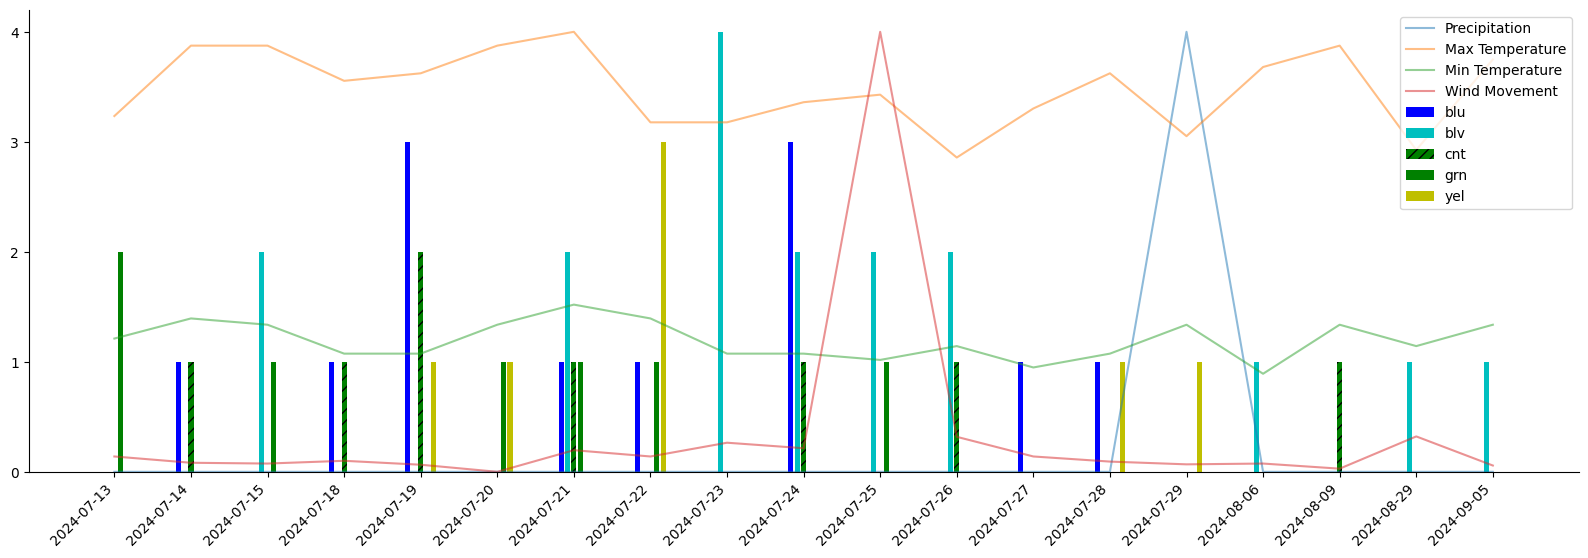

In [27]:
from matplotlib.ticker import MaxNLocator

fig, ax = plt.subplots(figsize=(20, 6))

bar_width = 0.4
num_colors = len(bombus_date_hour.columns) 
index_array = np.arange(len(bombus_date_hour)) * 6
offsets = np.linspace(-bar_width * num_colors/2, bar_width * num_colors/2, num_colors)


ax.plot(index_array, merged_weather['PRCP'], label='Precipitation', linestyle='-', alpha=0.5)
ax.plot(index_array, merged_weather['TMAX_scaled'], label='Max Temperature', linestyle='-', alpha=0.5)
ax.plot(index_array, merged_weather['TMIN_scaled'], label='Min Temperature', linestyle='-', alpha=0.5)
ax.plot(index_array, merged_weather['WDMV'], label='Wind Movement', linestyle='-', alpha=0.5)


for i, color in enumerate(bombus_date_hour.columns):
    plot_color, hatch_pattern = color_hatch_map.get(color, ('grey', ''))
    ax.bar(index_array + offsets[i], bombus_date_hour.loc[:, color], width=bar_width, label=color, color=plot_color, hatch=hatch_pattern)

mid_point_offset = offsets[int(len(offsets) / 2)]
ax.set_xticks(index_array + mid_point_offset)
ax.set_xticklabels(bombus_date_hour.index.strftime('%Y-%m-%d'), rotation=45, ha='right')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.yaxis.set_major_locator(MaxNLocator(integer=True))

ax.legend()


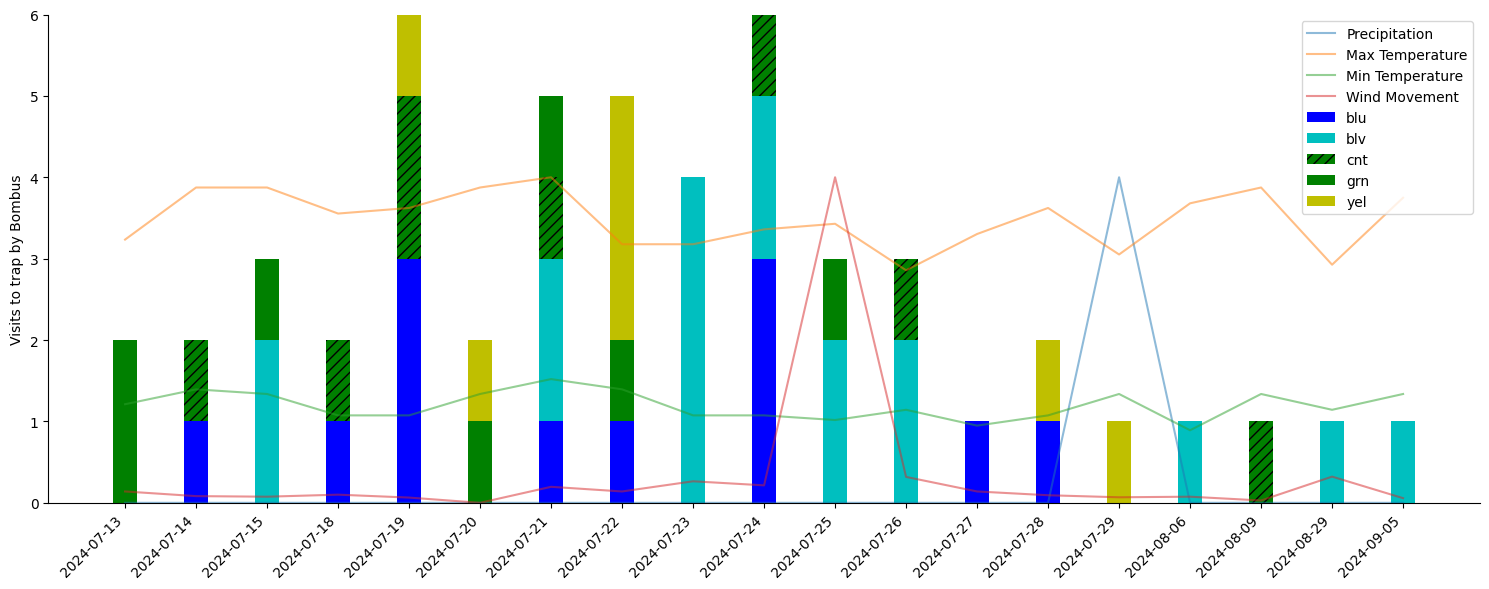

In [59]:
fig, ax = plt.subplots(figsize=(15, 6))

bar_width = 2
num_colors = len(bombus_date_hour.columns)
index_array = np.arange(len(bombus_date_hour)) * 6

ax.plot(index_array, merged_weather['PRCP'], label='Precipitation', linestyle='-', alpha=0.5)
ax.plot(index_array, merged_weather['TMAX_scaled'], label='Max Temperature', linestyle='-', alpha=0.5)
ax.plot(index_array, merged_weather['TMIN_scaled'], label='Min Temperature', linestyle='-', alpha=0.5)
ax.plot(index_array, merged_weather['WDMV'], label='Wind Movement', linestyle='-', alpha=0.5)

bottom = np.zeros(len(bombus_date_hour)) 
for i, color in enumerate(bombus_date_hour.columns):
    plot_color, hatch_pattern = color_hatch_map.get(color, ('grey', ''))
    ax.bar(index_array, bombus_date_hour[color], width=bar_width, label=color, color=plot_color, hatch=hatch_pattern, bottom=bottom)
    bottom += bombus_date_hour[color]  

ax.set_xticks(index_array)
ax.set_xticklabels(bombus_date_hour.index.strftime('%Y-%m-%d'), rotation=45, ha='right')
ax.set_ylabel('Visits to trap by Bombus')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

ax.legend()
plt.tight_layout()
plt.savefig('figs/bombus_visits_date_weather.png', format='png', dpi=300)

In [28]:
merged_all['hour'] = merged_all['datetime'].dt.hour
merged_all['date_hour'] = merged_all['datetime'].dt.date
merged_all = merged_all.sort_values('date_hour')
merged_all = merged_all[merged_all['datetime'].dt.month >= 7 ]

all_hour_counts = merged_all.groupby(['color', 'hour']).size().unstack(fill_value=0)
all_hour_counts = all_hour_counts.stack().reset_index()
all_hour_counts.columns = ['color', 'hour', 'count']
all_pivot = all_hour_counts.pivot(index='hour', columns='color', values='count').fillna(0)

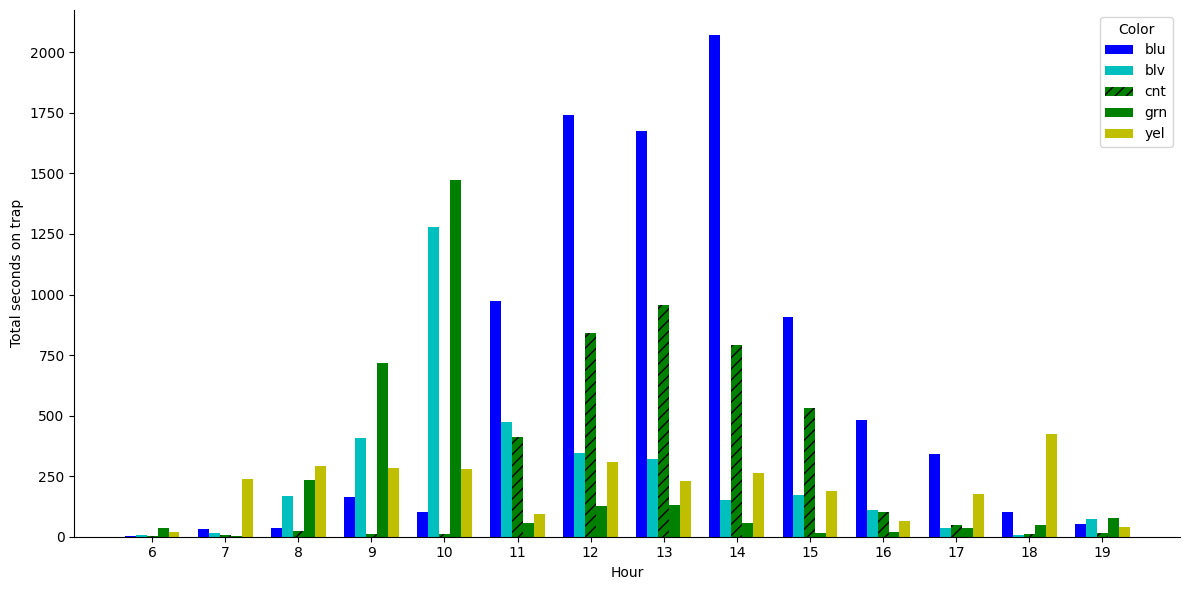

In [58]:
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.15
index_array = np.arange(len(all_pivot.index))
colors = all_pivot.columns
max_value = all_pivot.values.max()

for i, color in enumerate(colors):
    plot_color, hatch_pattern = color_hatch_map.get(color, ('grey', ''))
    ax.bar(index_array + i * bar_width, all_pivot[color], width=bar_width, label=color, color=plot_color, hatch=hatch_pattern)

# Formatting
ax.set_xticks(index_array + bar_width * (len(colors) - 1) / 2)
ax.set_xticklabels(all_pivot.index, rotation=0)
ax.set_xlabel('Hour')
ax.set_ylabel('Total seconds on trap')
ax.legend(title='Color')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
# ax.set_yscale('log')
plt.tight_layout()
plt.savefig('figs/tot_by_hour_all.png', format='png', dpi=300)

In [30]:
weather

,DATE,PRCP,TMAX,TMIN,WDMV
0,2024-07-12,0.0,31.1,10.6,129.0
1,2024-07-13,0.0,28.3,10.6,100.0
2,2024-07-14,0.0,33.9,12.2,84.0
3,2024-07-15,0.0,33.9,11.7,82.0
4,2024-07-16,0.0,32.2,14.4,98.0
...,...,...,...,...,...
56,2024-09-06,0.0,37.2,12.2,43.0
57,2024-09-07,0.0,32.8,13.3,40.0
58,2024-09-08,0.0,31.7,11.7,39.0
59,2024-09-09,0.0,31.1,11.1,58.0


In [31]:
all_date_hour = merged_all.groupby(['color', 'date_hour']).size().unstack(level=0, fill_value=0)
colors = all_date_hour.columns
width = 0.3
time_offsets = pd.to_timedelta(np.arange(len(all_date_hour.columns)) * width, unit='h')

all_date_hour.index = pd.to_datetime(all_date_hour.index)
all_merged_weather = weather[weather['DATE'].isin(all_date_hour.index)].copy()
all_merged_weather.set_index('DATE', inplace=True)

all_merged_weather['TMAX_scaled'] = all_merged_weather['TMAX']/8.75
all_merged_weather['TMIN_scaled'] = all_merged_weather['TMIN']/8.75
all_merged_weather[['PRCP', 'WDMV']] = scaler.fit_transform(all_merged_weather[['PRCP', 'WDMV']])

In [32]:
all_date_hour = all_date_hour.drop(pd.Timestamp('2024-07-11'))
all_date_hour

color,blu,blv,cnt,grn,yel
date_hour,,,,,
2024-07-12,11,0,9,35,58
2024-07-13,0,46,0,0,0
2024-07-14,36,0,11,18,0
2024-07-15,0,15,0,0,89
2024-07-16,0,0,0,83,79
2024-07-18,17,200,0,99,26
2024-07-19,0,0,10,0,0
2024-07-20,23,0,0,2,228
2024-07-21,236,0,8,261,0


In [33]:
all_merged_weather

,PRCP,TMAX,TMIN,WDMV,TMAX_scaled,TMIN_scaled
DATE,,,,,,
2024-07-12,0.000000,31.1,10.6,0.315513,3.554286,1.211429
2024-07-13,0.000000,28.3,10.6,0.213848,3.234286,1.211429
2024-07-14,0.000000,33.9,12.2,0.157756,3.874286,1.394286
2024-07-15,0.000000,33.9,11.7,0.150745,3.874286,1.337143
2024-07-16,0.000000,32.2,14.4,0.206836,3.680000,1.645714
2024-07-18,0.000000,31.1,9.4,0.175285,3.554286,1.074286
2024-07-19,0.000000,31.7,9.4,0.140228,3.622857,1.074286
2024-07-20,0.000000,33.9,11.7,0.077125,3.874286,1.337143
2024-07-21,0.000000,35.0,13.3,0.269939,4.000000,1.520000


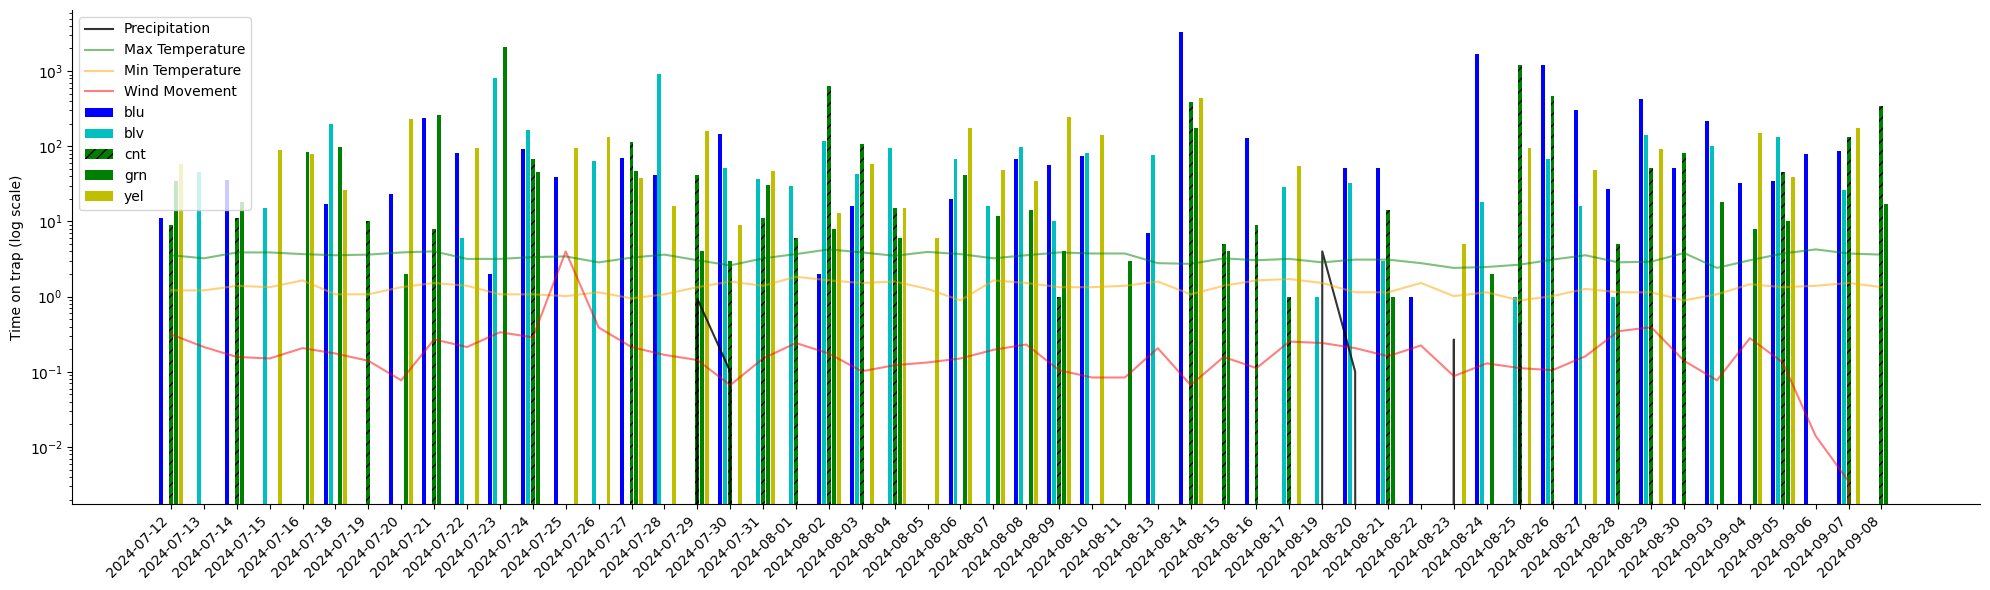

In [57]:

from matplotlib.ticker import MaxNLocator

fig, ax = plt.subplots(figsize=(20, 6))

bar_width = .6
num_colors = len(all_date_hour.columns) 
index_array = np.arange(len(all_date_hour)) * 5
offsets = np.linspace(-bar_width * num_colors/2, bar_width * num_colors/2, num_colors)

ax.plot(index_array, all_merged_weather['PRCP'], label='Precipitation', linestyle='-', alpha=0.8, c='k')
ax.plot(index_array, all_merged_weather['TMAX_scaled'], label='Max Temperature', linestyle='-', alpha=0.5, c='g')
ax.plot(index_array, all_merged_weather['TMIN_scaled'], label='Min Temperature', linestyle='-', alpha=0.5, c='orange')
ax.plot(index_array, all_merged_weather['WDMV'], label='Wind Movement', linestyle='-', alpha=0.5, c='r')


for i, color in enumerate(all_date_hour.columns):
    plot_color, hatch_pattern = color_hatch_map.get(color, ('grey', ''))
    ax.bar(index_array + offsets[i], all_date_hour.loc[:, color], width=bar_width, label=color, color=plot_color, hatch=hatch_pattern)

mid_point_offset = offsets[int(len(offsets) / 2)]
ax.set_xticks(index_array + mid_point_offset)
ax.set_xticklabels(all_date_hour.index.strftime('%Y-%m-%d'), rotation=45, ha='right')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_yscale('log')
ax.legend()
ax.set_ylabel('Time on trap (log scale)')

plt.tight_layout()
plt.savefig('figs/tot_by_date_all.png', format='png', dpi=300)


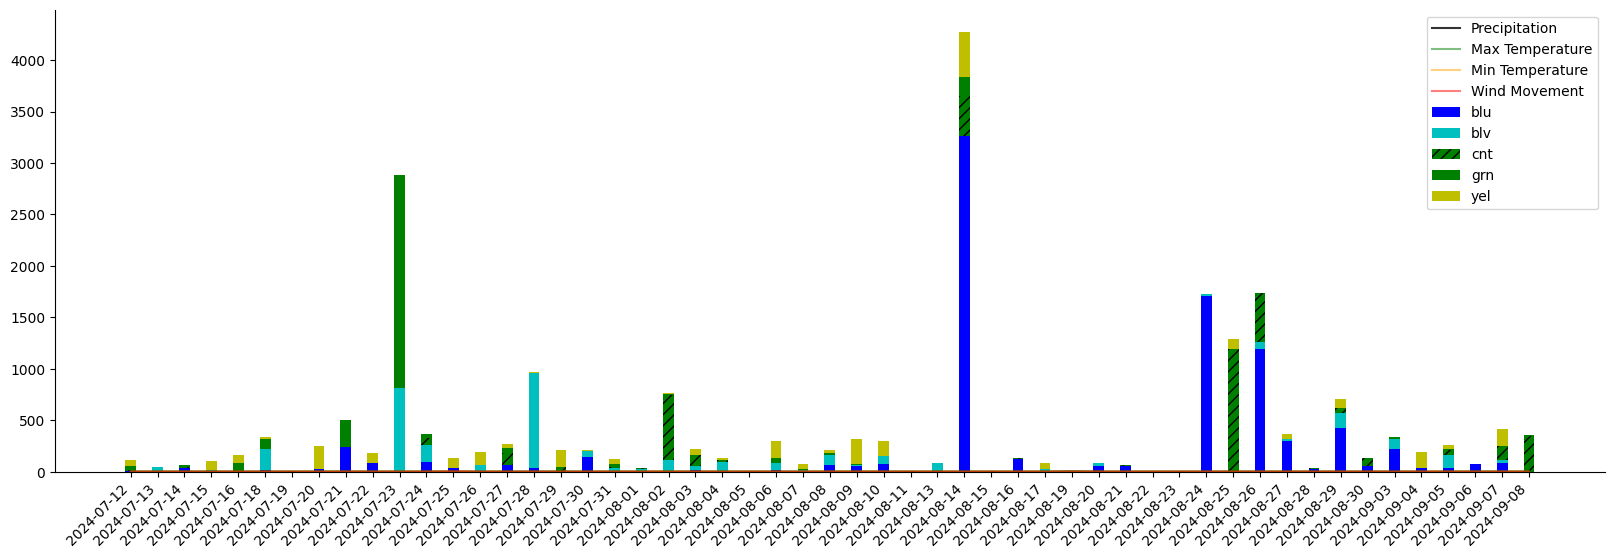

In [ ]:

fig, ax = plt.subplots(figsize=(20, 6))

bar_width = 2
num_colors = len(all_date_hour.columns)
index_array = np.arange(len(all_date_hour)) * 5

# Plot the line graphs
ax.plot(index_array, all_merged_weather['PRCP'], label='Precipitation', linestyle='-', alpha=0.8, color='k')
ax.plot(index_array, all_merged_weather['TMAX_scaled'], label='Max Temperature', linestyle='-', alpha=0.5, color='g')
ax.plot(index_array, all_merged_weather['TMIN_scaled'], label='Min Temperature', linestyle='-', alpha=0.5, color='orange')
ax.plot(index_array, all_merged_weather['WDMV'], label='Wind Movement', linestyle='-', alpha=0.5, color='r')

bottom = np.zeros(len(all_date_hour))  # Initialize bottom for stacking
for i, color in enumerate(all_date_hour.columns):
    plot_color, hatch_pattern = color_hatch_map.get(color, ('grey', ''))
    ax.bar(index_array, all_date_hour[color], width=bar_width, label=color, color=plot_color, hatch=hatch_pattern, bottom=bottom)
    bottom += all_date_hour[color]  # Update bottom for the next bar in the stack

# Set x-tick labels
ax.set_xticks(index_array)
ax.set_xticklabels(all_date_hour.index.strftime('%Y-%m-%d'), rotation=45, ha='right')

# Customize plot appearance
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
# ax.set_yscale('log')  # Set y-axis to log scale

# Display legend
ax.legend()